In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../src')
from torch_utils import *

accuracy: 0.473 +- 0.091
f1: 0.387 +- 0.086
precision: 0.393 +- 0.114
recall: 0.467 +- 0.058
sensitivity: 0.467 +- 0.058
recall: 0.467 +- 0.058


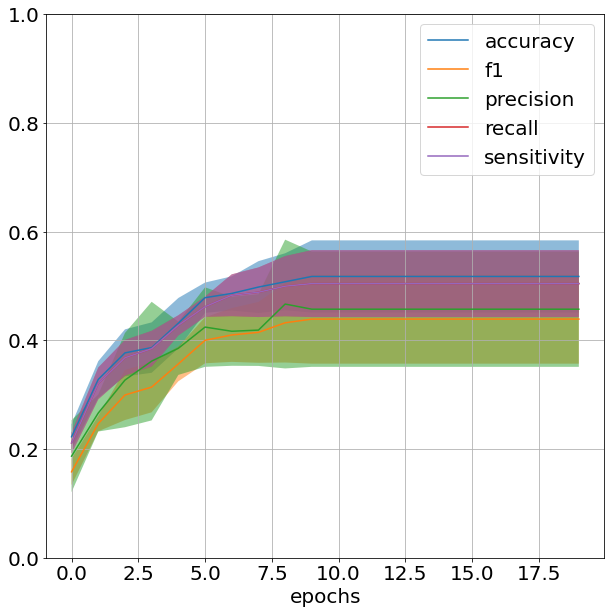

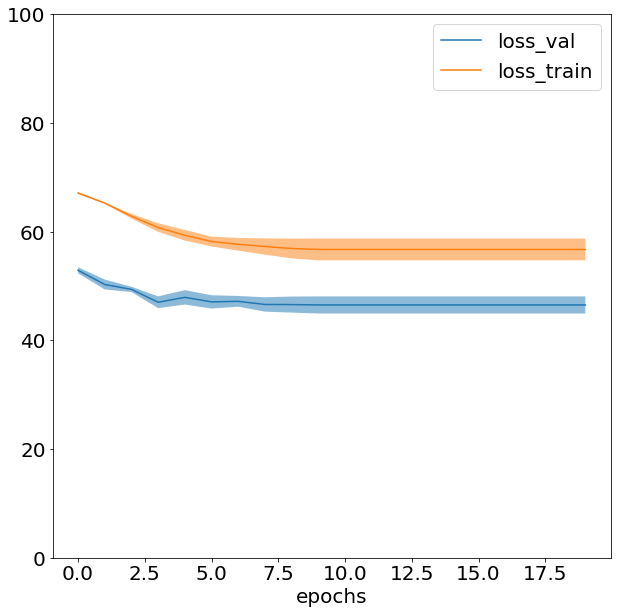

In [4]:
results_path = '../results/testing'
metrics_list = ['accuracy','f1','precision','recall','sensitivity','recall']
max_epochs = 20
metrics_dict = read_train_history(results_path,metrics_list,max_epochs)

#plot metrics on validation data
plot_mean_std({metric:np.array(metrics_dict[metric]) for metric in metrics_list},'',fontsize=20,y_lim = 1.0)  

#plot loss on train and validation
plot_mean_std({metric:np.array(metrics_dict[metric]) for metric in ['loss_val','loss_train']},'',fontsize=20)  

#print mean and std of metrics on test data
for metric in metrics_list:
    mean,std = mean_std_metric(np.array(metrics_dict[f'{metric}_test']))
    print(f'{metric}: {mean:.3f} +- {std:.3f}')


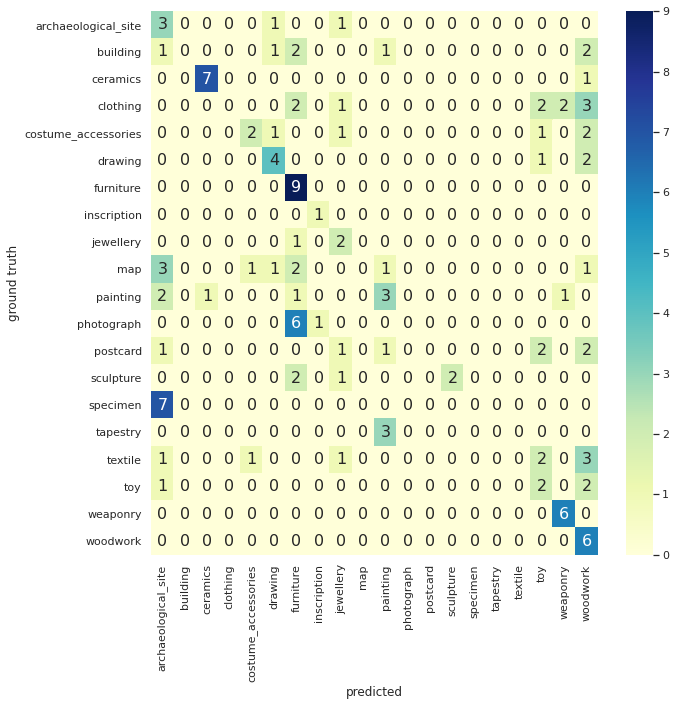

In [5]:
info_path = os.path.join(results_path,'split_0','training_info.pth')
training_info = torch.load(info_path)
confusion_matrix = training_info['confusion_matrix_test']
labels = [training_info['encoding_dict'][i] for i in range(confusion_matrix.shape[0])]
plot_conf_matrix(confusion_matrix,labels,font_scale=1)
    